In [1]:
import numpy as np
import matplotlib.pyplot as plt

from common.util import (
    preprocess, 
    create_co_matrix,
    cos_similarity,
    most_similar,
    ppmi,
)

In [2]:
text = "You say goodbye and I say hello."

corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id["you"]]
c1 = C[word_to_id["i"]]
cos_similarity(c0, c1)

0.7071067758832467

In [3]:
most_similar("you", word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067758832467
 i: 0.7071067758832467
 hello: 0.7071067758832467
 say: 0.0
 and: 0.0


In [4]:
most_similar("mine", word_to_id, id_to_word, C, top=5)

mine is not found


In [5]:
W = ppmi(C)

np.set_printoptions(precision=3) # 有効数字3桁で表示
print("covariance matrix")
print(C)
print("-" * 50)
print("PPMI")
print(W)

covariance matrix
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


In [6]:
# SVDで次元削減
# Uを単語空間として扱うことができる
# Sは特異値が大きい順に並んでおり、重要度として解釈可能
U, S, V = np.linalg.svd(W)

In [7]:
print(C[0]) # 共起行列
print(W[0]) # PPMI行列
print(U[0]) # SVD

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[ 0.000e+00  3.409e-01 -1.205e-01 -3.886e-16 -1.110e-16 -9.323e-01
 -2.426e-17]


In [8]:
# 実際に２次元のベクトルに次元削減は、
# 先頭から２つの要素を取り出す
U[0, :2]

array([0.   , 0.341], dtype=float32)

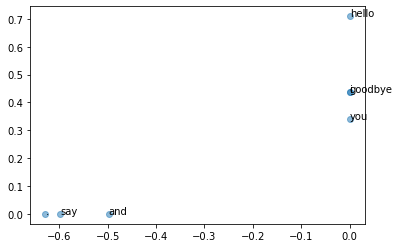

In [9]:
for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
    
plt.scatter(U[:, 0], U[:, 1], alpha=0.5)
plt.show()

## ptbのコーパスを確認する

- ptbコーパスはword2vecの開発者であるTomas Mikolov氏が公開している

In [10]:
from data import ptb

In [11]:
corpus, word_to_id, id_to_word = ptb.load_data("train")

print(f"corpus size:{len(corpus)}")
print(f"corpus[:30]{corpus[:30]}\n")
print(f"id_to_word[0]:{id_to_word[0]}")
print(f"id_to_word[1]:{id_to_word[1]}")
print(f"id_to_word[2]:{id_to_word[2]}\n")
print(f"word_to_id['car']:{word_to_id['car']}")
print(f"word_to_id['happy']:{word_to_id['happy']}")
print(f"word_to_id['lexus']:{word_to_id['lexus']}")

corpus size:929589
corpus[:30][ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]:aer
id_to_word[1]:banknote
id_to_word[2]:berlitz

word_to_id['car']:3856
word_to_id['happy']:4428
word_to_id['lexus']:7426


### ptbに今までの手法を適用する

In [13]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word =  ptb.load_data("train")
vocab_size = len(word_to_id)
print("counting co-occurrence ...")
C = create_co_matrix(corpus, vocab_size, window_size)
print("calculating PPMI ...")
W = ppmi(C, verbose=True)

print("calculating SVD")
try:
    print("truncated SVD (faster than SVD)")
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)
except ImportError:
    print("SVD (slow)")
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:, :wordvec_size]

querys = ["you", "year", "car", "toyota"]
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

counting co-occurrence ...
calculating PPMI ...
%.1f%% done 1.0
%.1f%% done 2.0
%.1f%% done 3.0
%.1f%% done 4.0
%.1f%% done 5.0
%.1f%% done 6.0
%.1f%% done 7.0
%.1f%% done 8.0
%.1f%% done 9.0
%.1f%% done 10.0
%.1f%% done 11.0
%.1f%% done 12.0
%.1f%% done 13.0
%.1f%% done 14.0
%.1f%% done 15.0
%.1f%% done 16.0
%.1f%% done 17.0
%.1f%% done 18.0
%.1f%% done 19.0
%.1f%% done 20.0
%.1f%% done 21.0
%.1f%% done 22.0
%.1f%% done 23.0
%.1f%% done 24.0
%.1f%% done 25.0
%.1f%% done 26.0
%.1f%% done 27.0
%.1f%% done 28.0
%.1f%% done 29.0
%.1f%% done 30.0
%.1f%% done 31.0
%.1f%% done 32.0
%.1f%% done 33.0
%.1f%% done 34.0
%.1f%% done 35.0
%.1f%% done 36.0
%.1f%% done 37.0
%.1f%% done 38.0
%.1f%% done 39.0
%.1f%% done 40.0
%.1f%% done 41.0
%.1f%% done 42.0
%.1f%% done 43.0
%.1f%% done 44.0
%.1f%% done 45.0
%.1f%% done 46.0
%.1f%% done 47.0
%.1f%% done 48.0
%.1f%% done 49.0
%.1f%% done 50.0
%.1f%% done 51.0
%.1f%% done 52.0
%.1f%% done 53.0
%.1f%% done 54.0
%.1f%% done 55.0
%.1f%% done 56.0
%.1f%% do